<a href="https://colab.research.google.com/github/tekabu/edible-leaves-training/blob/main/Edible_Leaves_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Set runtime to GPU first

Install requirements

In [ ]:
# !pip install ultralytics==8.0.55
!pip install ultralytics<=8.3.40

Check pytorch version

In [2]:
import torch
torch.__version__

'2.5.1+cu124'

Download dataset from roboflow

In [3]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="mUK8juGpu44ufCF4yIFS")
project = rf.workspace("research-project-srsvr").project("edible-leaves")
version = project.version(1)
dataset = version.download("folder")

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to Edible-Leaves-1 in folder:: 100%|██████████| 5352/5352 [00:02<00:00, 2667.04it/s]


Train

In [ ]:
!yolo task=detect epochs=100 data=/content/IR-TRAINING-1-1/data.yaml model=yolov8s.pt imgsz=640

WARNING ⚠️ 'mode' is missing. Valid modes are ('train', 'val', 'predict', 'export', 'track', 'benchmark'). Using default 'mode=train'.
Ultralytics YOLOv8.0.55 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/IR-TRAINING-1-1/data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnos

Test model

In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train2/weights/best.pt conf=0.5 source=/content/IR-TRAINING-1-1/test/images save=True

Ultralytics YOLOv8.0.55 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients, 28.4 GFLOPs

image 1/33 /content/IR-TRAINING-1-1/test/images/WIN_20230305_20_15_33_Pro_jpg.rf.3b51be737d70880340dbcfa5a8f8dc80.jpg: 640x640 1 Plastic, 17.1ms
image 2/33 /content/IR-TRAINING-1-1/test/images/WIN_20230305_20_15_58_Pro_jpg.rf.39a2ee5103e92bc210aa9e7728c67e20.jpg: 640x640 1 Plastic, 17.1ms
image 3/33 /content/IR-TRAINING-1-1/test/images/WIN_20230305_20_16_39_Pro_jpg.rf.aba7eb806d1cea298bf6946d34247dd8.jpg: 640x640 1 Plastic, 17.1ms
image 4/33 /content/IR-TRAINING-1-1/test/images/WIN_20230305_20_21_00_Pro_jpg.rf.c39ca0d56ba39af7e0973f9fd046b1ee.jpg: 640x640 1 Plastic, 17.0ms
image 5/33 /content/IR-TRAINING-1-1/test/images/WIN_20230305_20_21_28_Pro_jpg.rf.5e847ee3e0016f04984991d91238c9cb.jpg: 640x640 1 Plastic, 16.0ms
image 6/33 /content/IR-TRAINING-1-1/test/images/WIN_20230305_20_22_51_Pro_jpg.rf.a350ab510e16e871f4f972536

Display result

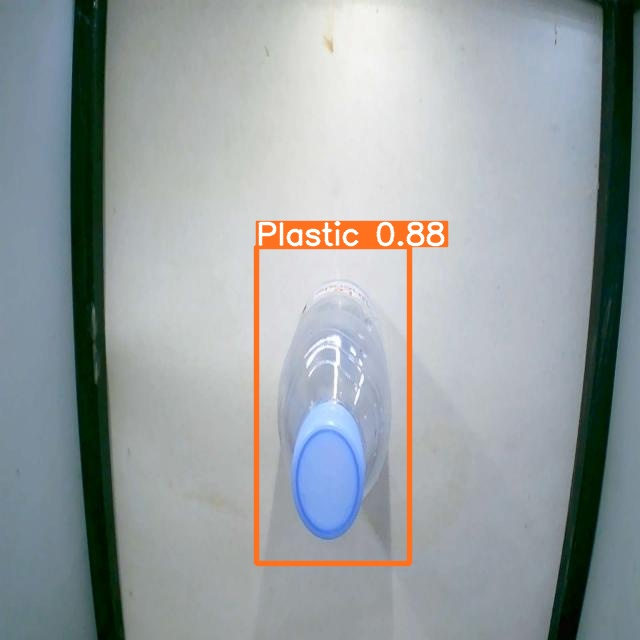

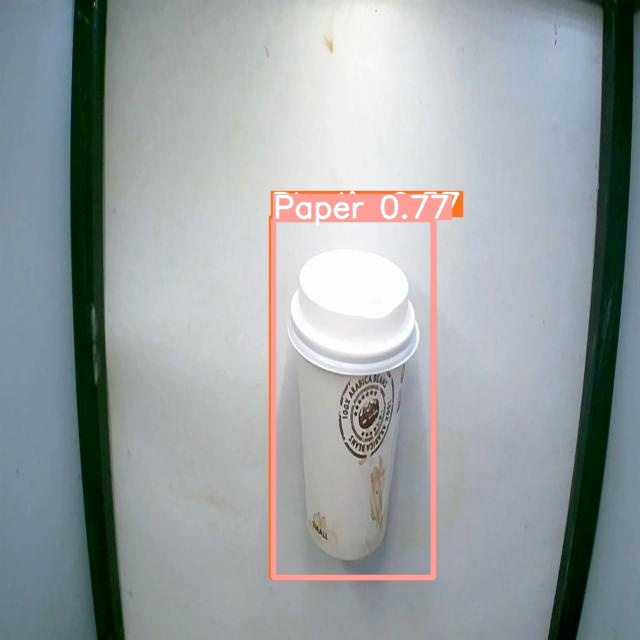

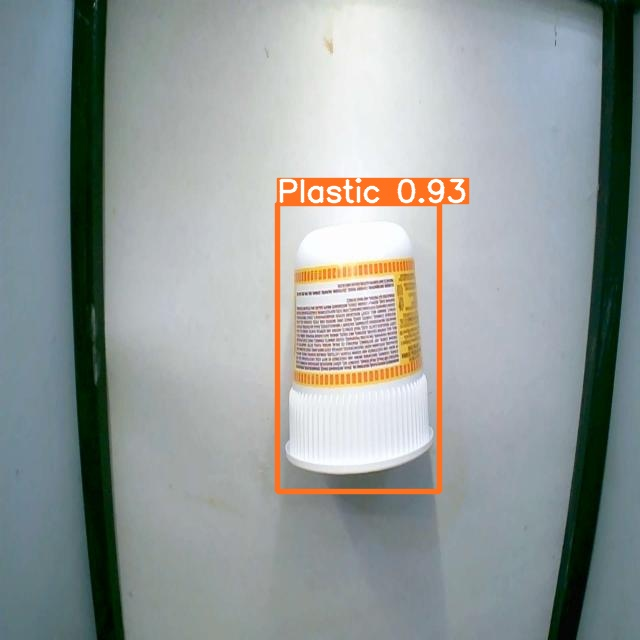

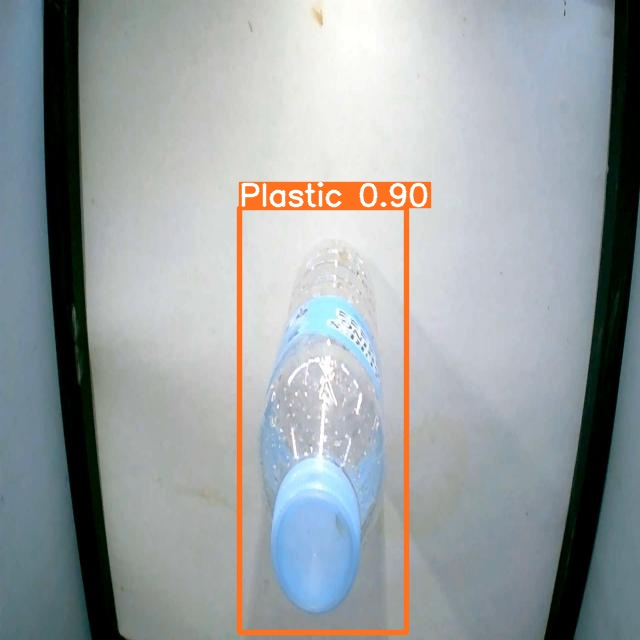

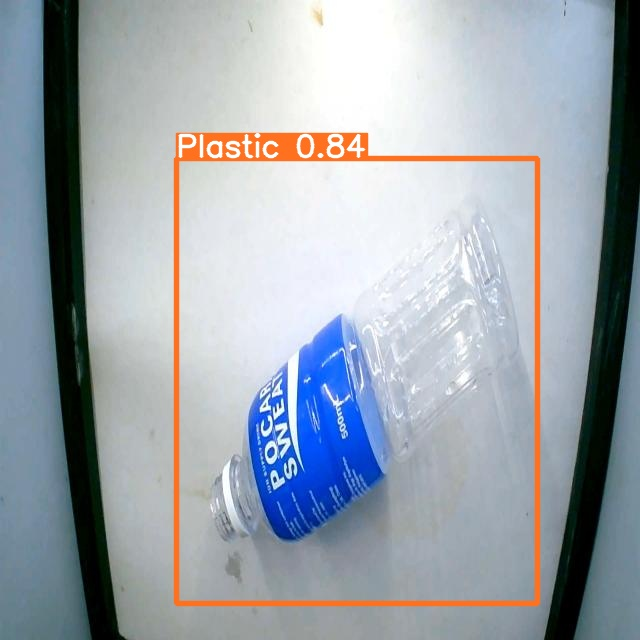

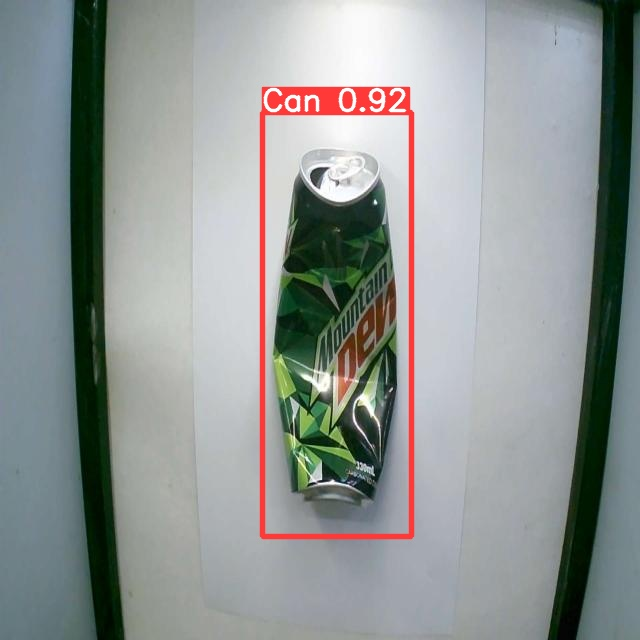

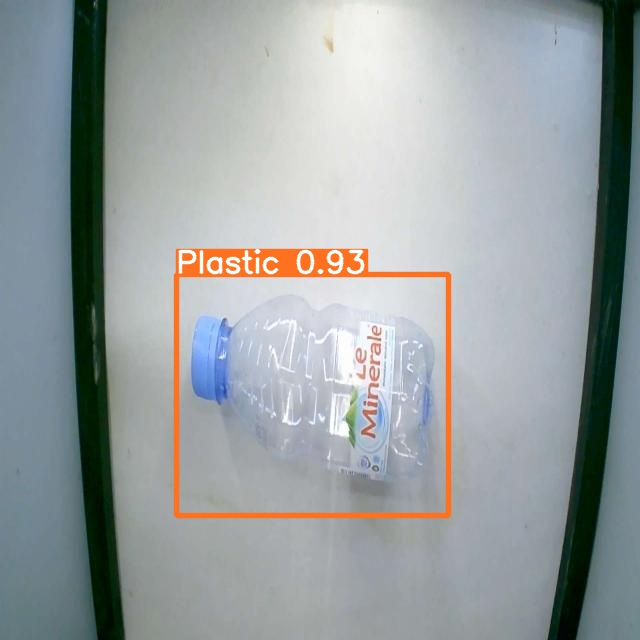

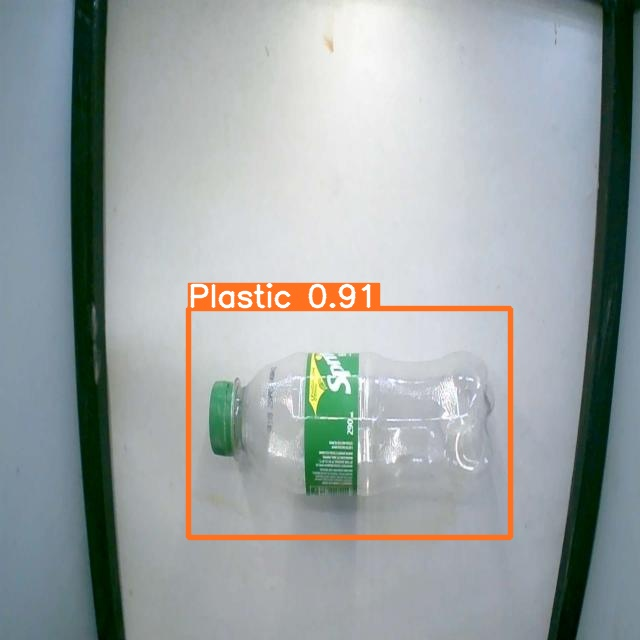

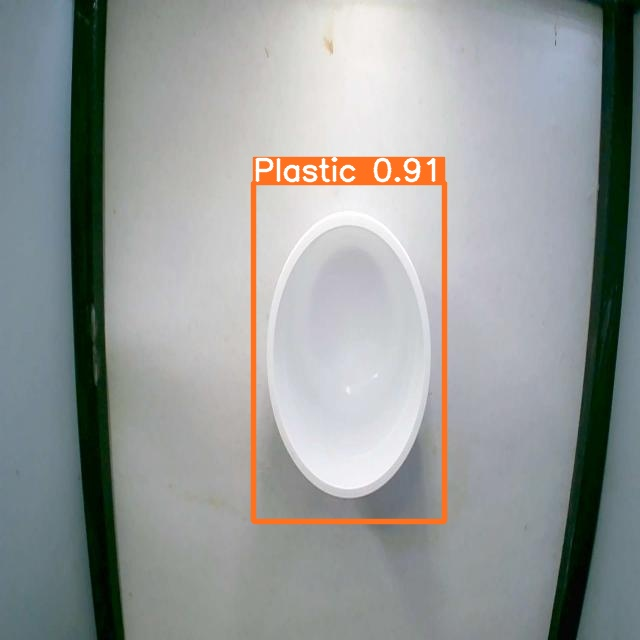

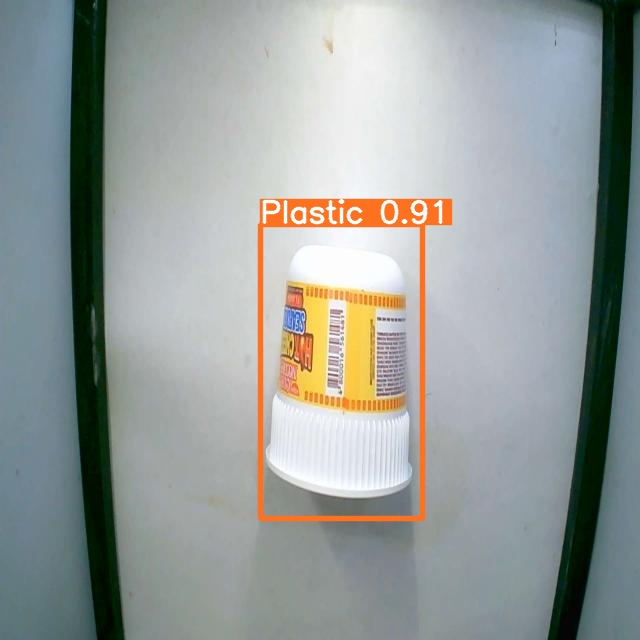

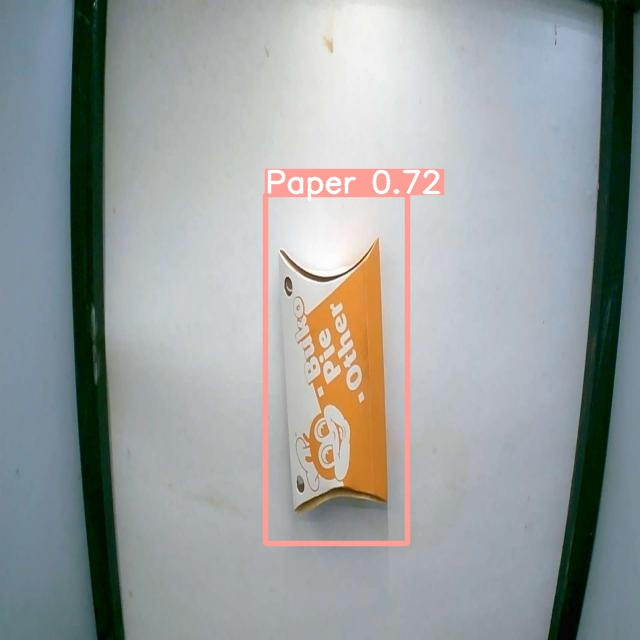

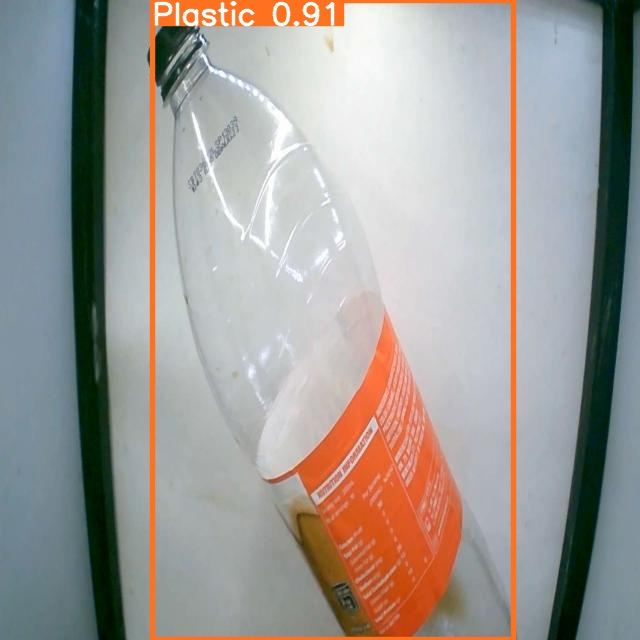

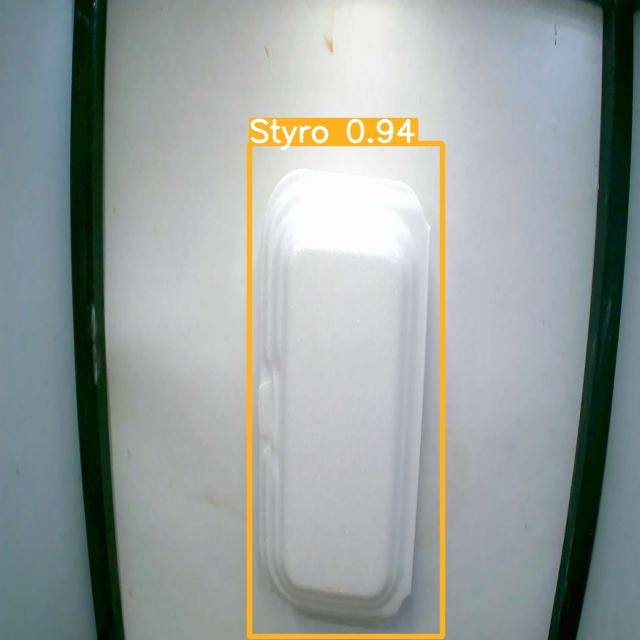

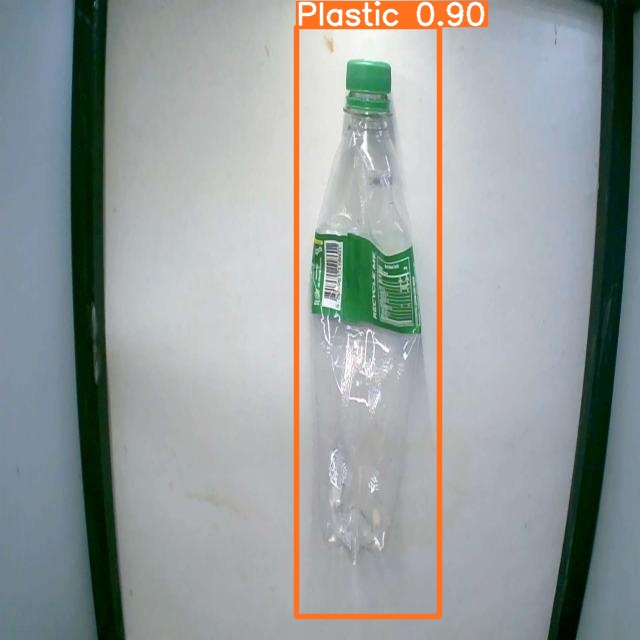

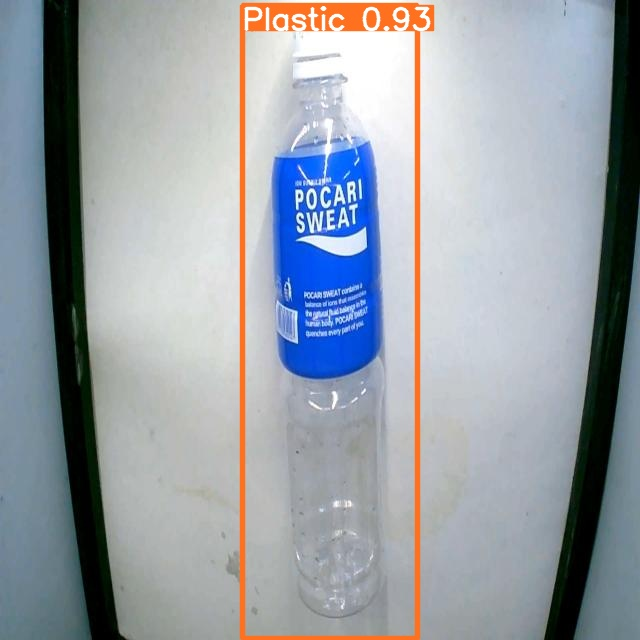

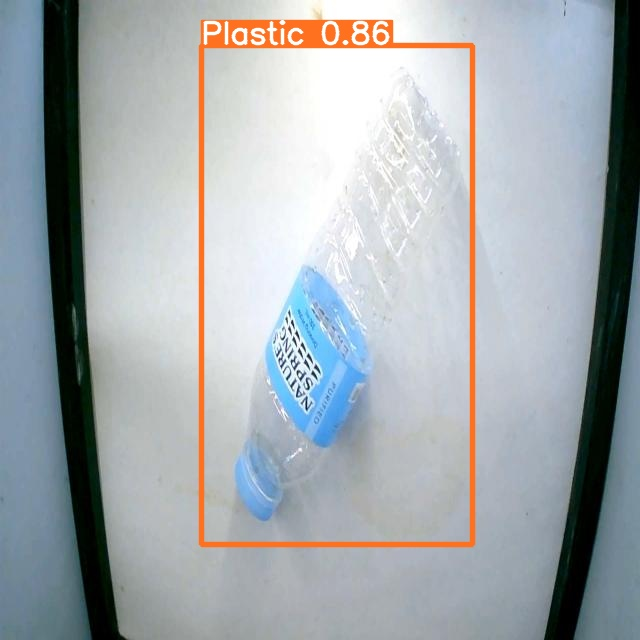

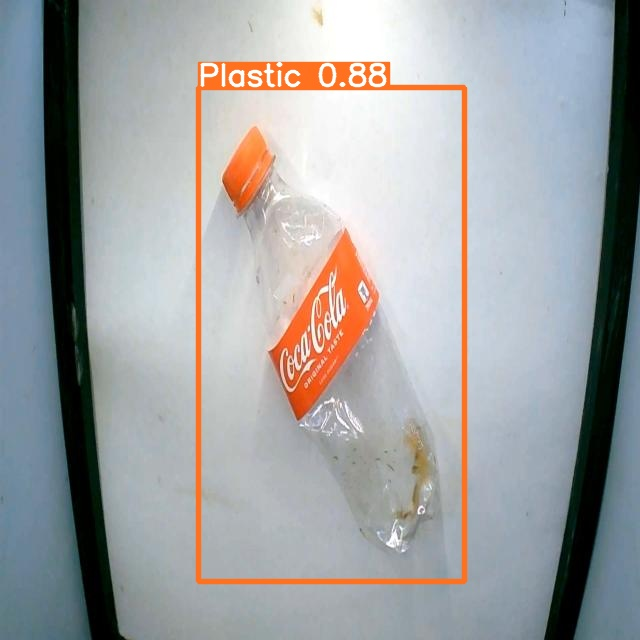

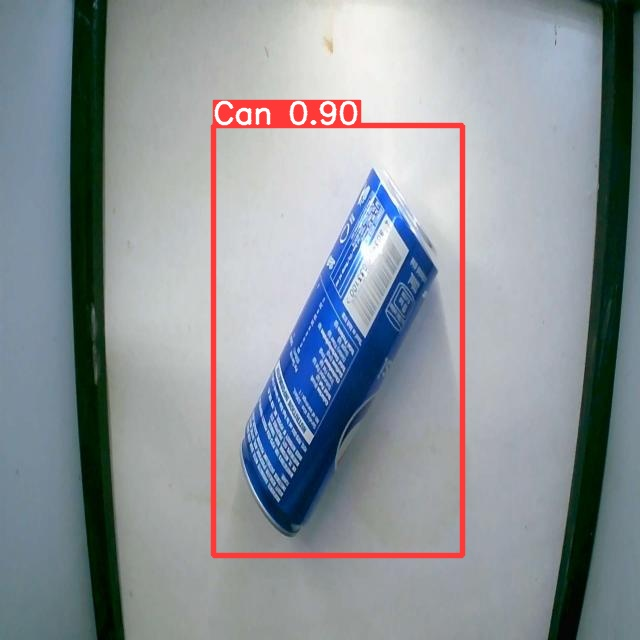

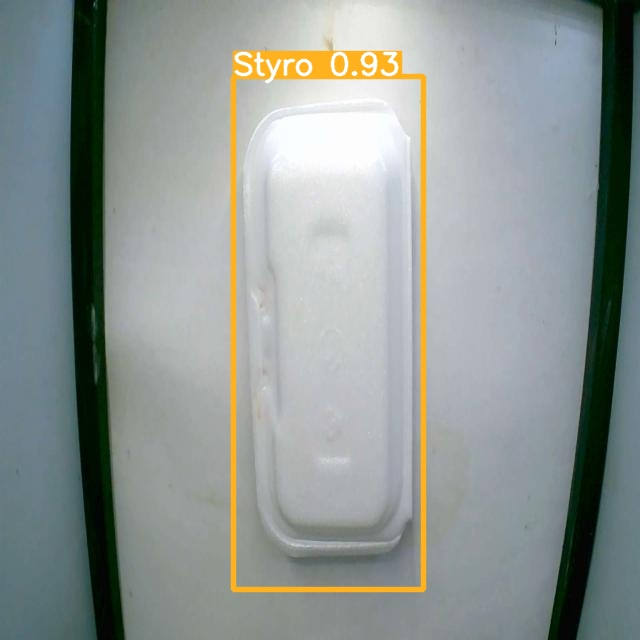

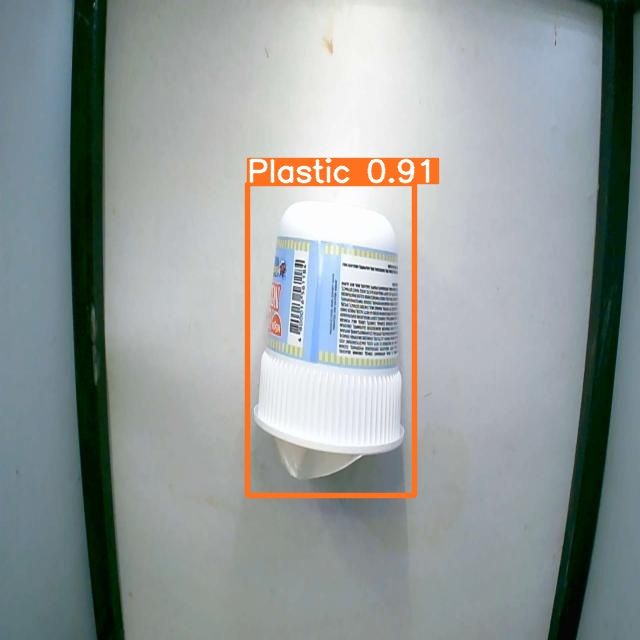

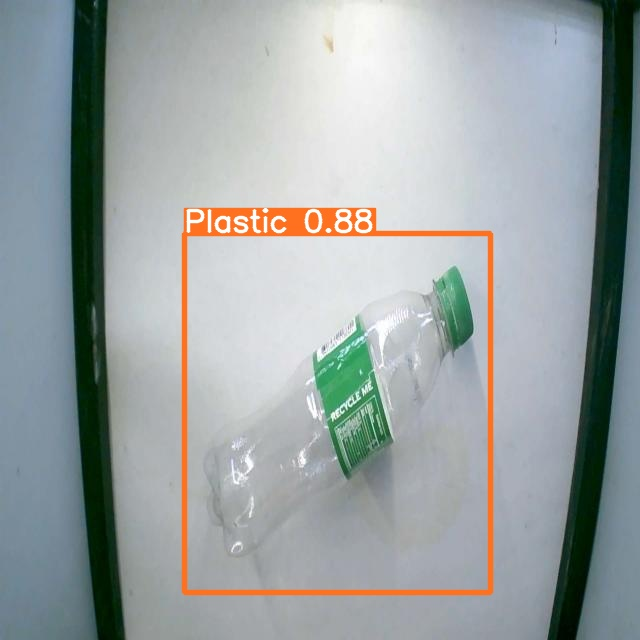

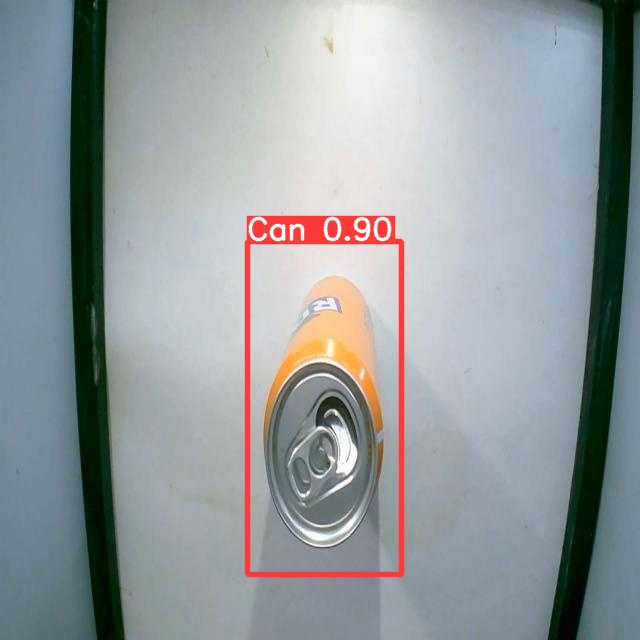

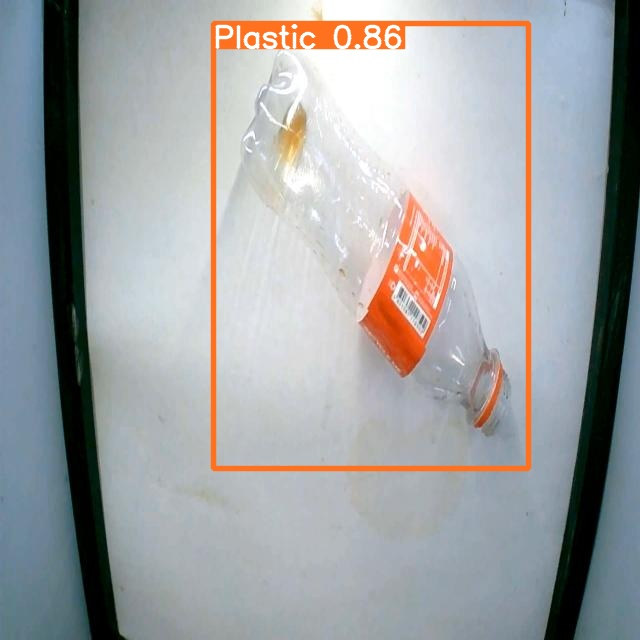

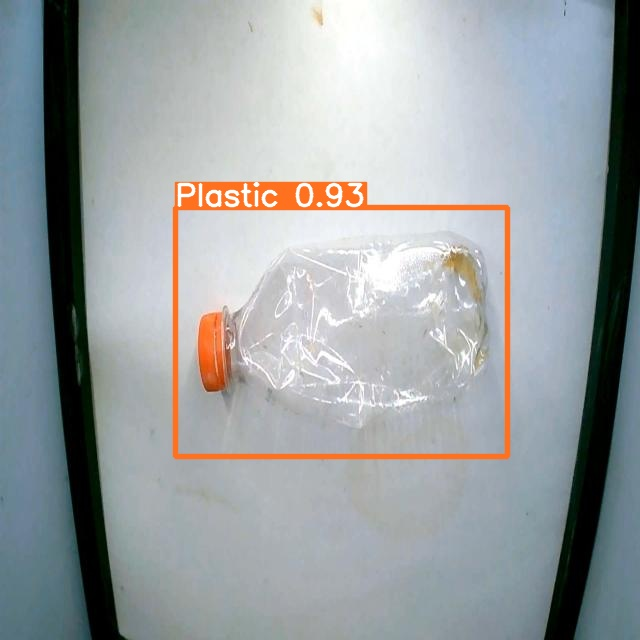

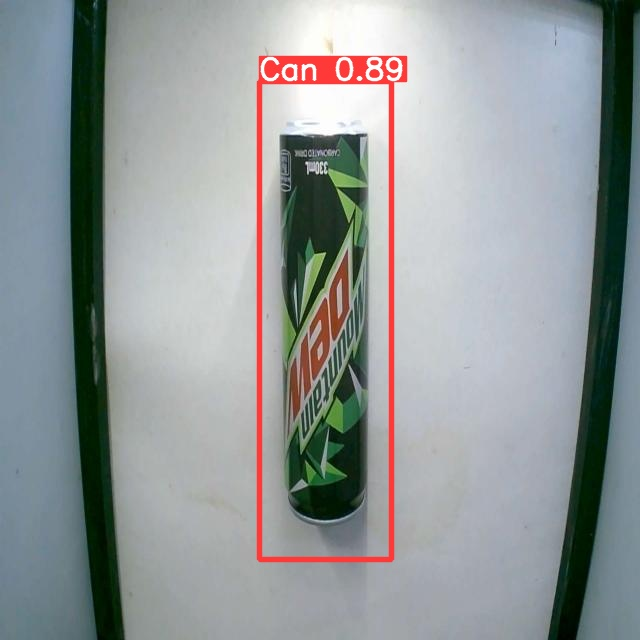

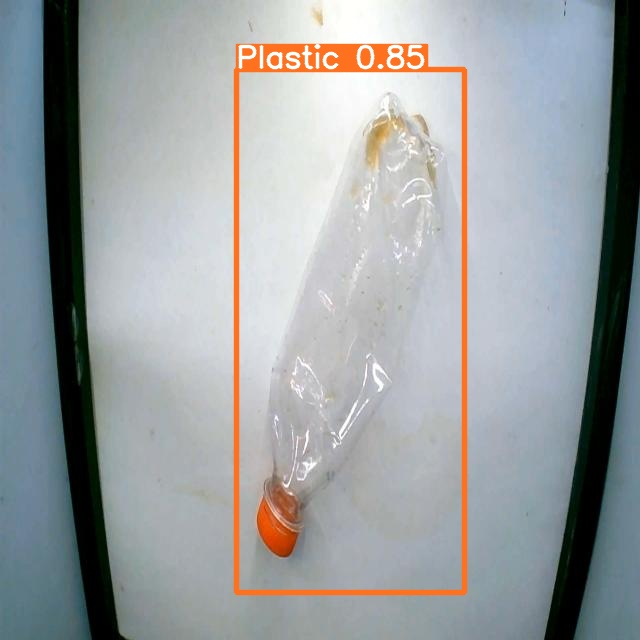

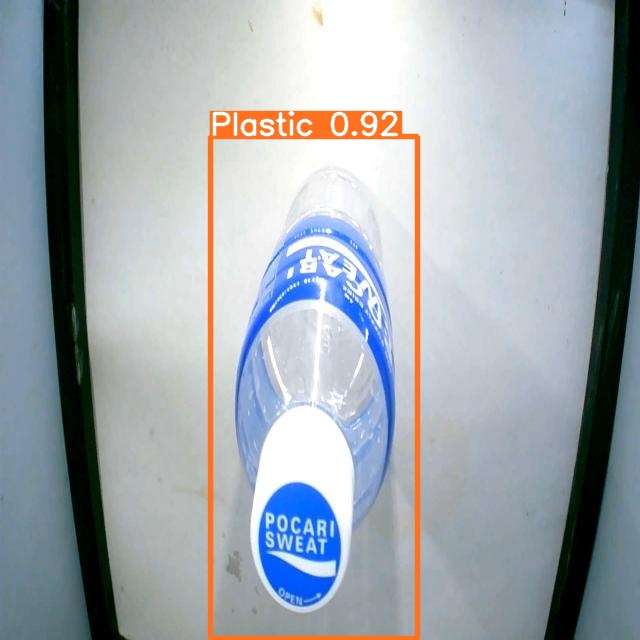

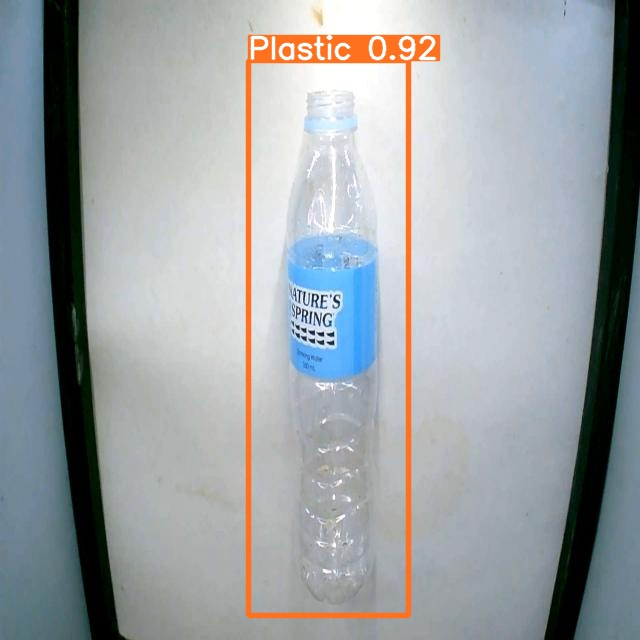

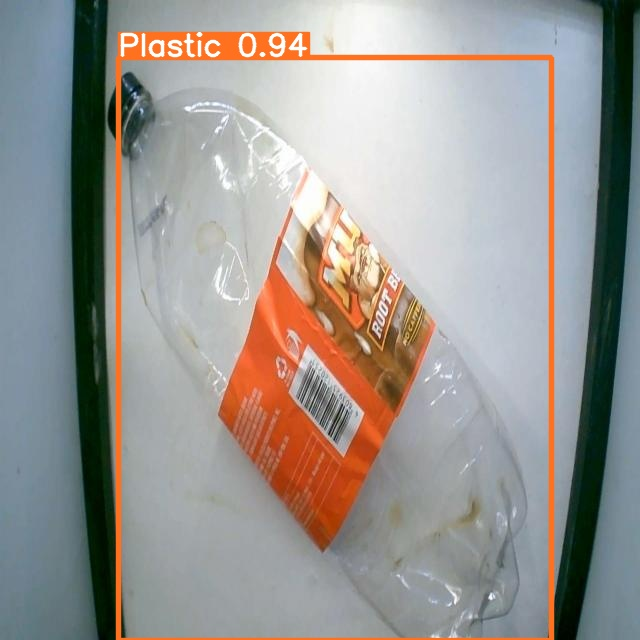

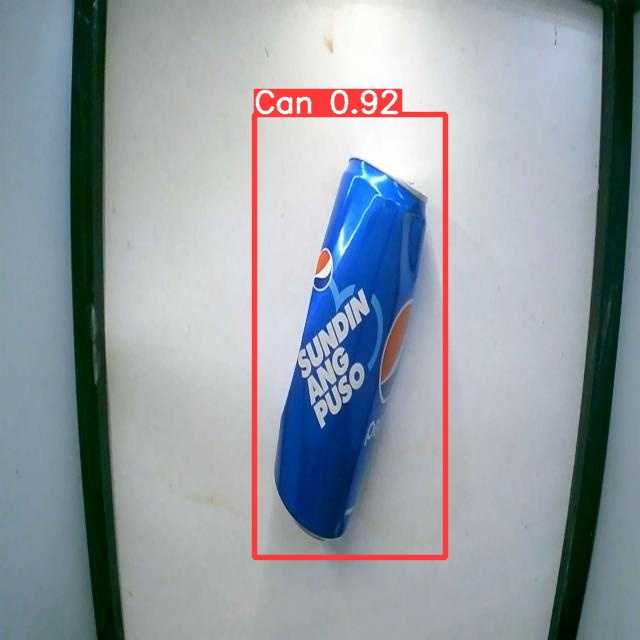

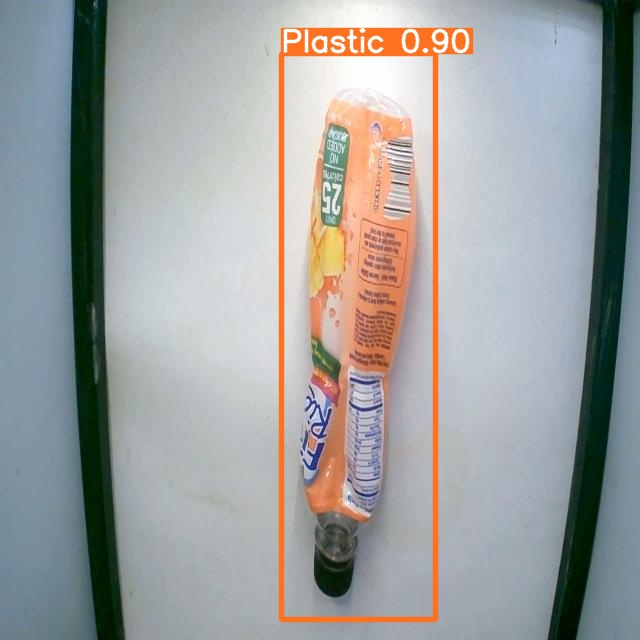

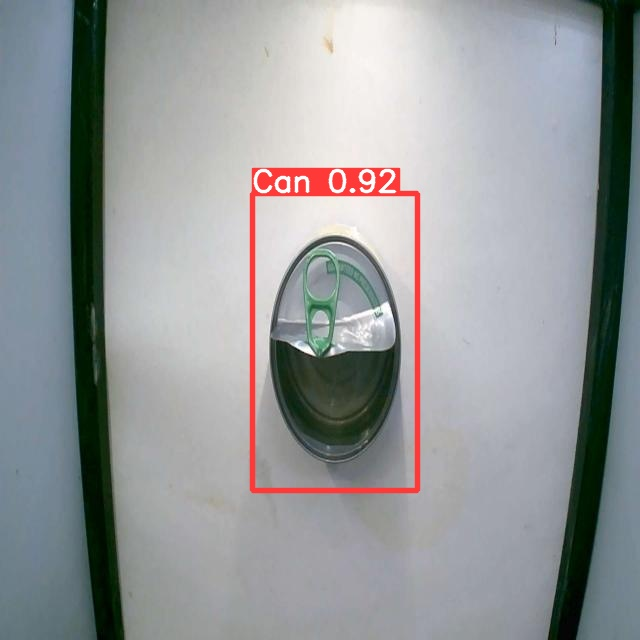

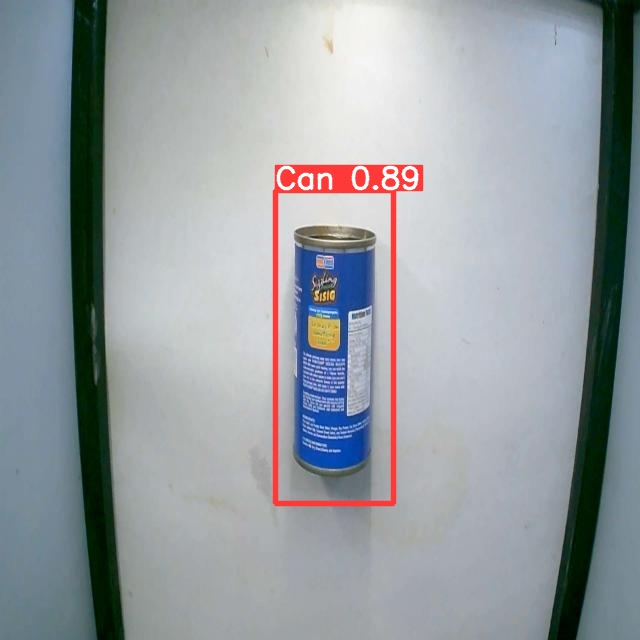

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg'):
      display(Image(filename=image_path, width=600))
      print("\n")

In [ ]:
!zip -r train.zip /content/runs/detect/train2/*

  adding: content/runs/detect/train2/args.yaml (deflated 50%)
  adding: content/runs/detect/train2/confusion_matrix.png (deflated 34%)
  adding: content/runs/detect/train2/events.out.tfevents.1679563018.643bd3617ce1.2624.0 (deflated 72%)
  adding: content/runs/detect/train2/F1_curve.png (deflated 13%)
  adding: content/runs/detect/train2/labels_correlogram.jpg (deflated 41%)
  adding: content/runs/detect/train2/labels.jpg (deflated 22%)
  adding: content/runs/detect/train2/P_curve.png (deflated 18%)
  adding: content/runs/detect/train2/PR_curve.png (deflated 23%)
  adding: content/runs/detect/train2/R_curve.png (deflated 15%)
  adding: content/runs/detect/train2/results.csv (deflated 85%)
  adding: content/runs/detect/train2/results.png (deflated 9%)
  adding: content/runs/detect/train2/train_batch0.jpg (deflated 5%)
  adding: content/runs/detect/train2/train_batch1.jpg (deflated 6%)
  adding: content/runs/detect/train2/train_batch2.jpg (deflated 5%)
  adding: content/runs/detect/train

In [ ]:
from google.colab import files
files.download('/content/train.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>